### Wstęp do Uczenia Maszynowego 
##### Laboratorium 7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

### 1. Linear Discriminant Analysis (LDA)

In [2]:
Default = pd.read_csv("Default.csv")

In [3]:
Default

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


### Zadanie 1
-----
Przygotujmy dane do dalszej pracy:

a) zmienną objaśnianą jest `default`

b) zmiennymi objaśniającymi, których będziemy używać są `student` i `balance`

c) zamień zmienną `student` na logiczną, 1 gdy przyjmuje wartość `Yes`, 0 gdy przyjmuje wartość `No`

d) podziel dane na treningowe i testowe w proporcji 6:4 i ustaw parametr `random_state`=131124

In [4]:
y = Default.default
X = Default.drop(["default", "income"], axis = 1)
X.student = X.student == "Yes"

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 131124)

`Default` jest to symulowany zestaw danych zawierający informacje o dziesięciu tysiącach klientów, takie jak to, czy klient nie wywiązał się ze zobowiązań, czy jest studentem, średnie saldo utrzymywane przez klienta i dochód klienta.

- Gdy klasy zmiennej odpowiedzi Y (tj. domyślnie = "Tak", domyślnie = "Nie") są dobrze rozdzielone, oszacowania parametrów dla modelu regresji logistycznej są zaskakująco niestabilne. LDA i QDA nie cierpią z powodu tego problemu.
- Jeśli n jest małe, a rozkład predyktorów X jest w przybliżeniu normalny w każdej z klas, modele LDA i QDA są ponownie bardziej stabilne niż model regresji logistycznej.
- LDA i QDA są często preferowane w stosunku do regresji logistycznej, gdy mamy więcej niż dwie klasy odpowiedzi - bez porządku (tj.: udar, przedawkowanie narkotyków i napad padaczkowy).
- Zawsze dobrze jest porównać wyniki różnych technik analitycznych; może to pomóc w potwierdzeniu wyników lub podkreślić, w jaki sposób różne założenia modelowania i charakterystyki odkrywają nowe spostrzeżenia.

### Zadanie 2
-----
Policz udział każdej z klas w zbiorze danych. Policz średnie w podgrupach: dla zmiennej `student` względem y oraz dla zmiennej `balance` względem y.

In [7]:
print('y = Yes,', np.mean(y_train == 'No'))
print('y = No,', np.mean(y_train == 'Yes'))

y = Yes, 0.967
y = No, 0.033


In [8]:
print('y = Yes, student:', X_train.iloc[np.where(y_train == 'Yes')].student.mean())
print('y = No, student:', X_train.iloc[np.where(y_train == 'No')].student.mean())

y = Yes, student: 0.41414141414141414
y = No, student: 0.2893829713891761


In [9]:
print('y = Yes, balance:', X_train.iloc[np.where(y_train == 'Yes')].balance.mean())
print('y = No, balance:', X_train.iloc[np.where(y_train == 'No')].balance.mean())

y = Yes, balance: 1760.6627683465954
y = No, balance: 805.9690523003846


### Zadanie 3
-----
Przygotuj model `LinearDiscriminantAnalysis` dla zbioru treningowego.

In [10]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
LDA.priors_

array([0.967, 0.033])

In [12]:
LDA.means_

array([[2.89382971e-01, 8.05969052e+02],
       [4.14141414e-01, 1.76066277e+03]])

In [13]:
LDA.coef_

array([[-0.33234161,  0.00473073]])

In [14]:
LDA.intercept_

array([-9.33180201])

### Zadanie 4
-----
Na podstawie wyliczonych współczynników oblicz funkcję decyzyją dla obserwacji ze zbioru treningowego. Rezultaty przedstaw na wykresie w podziale na wartości zmiennej `y`.

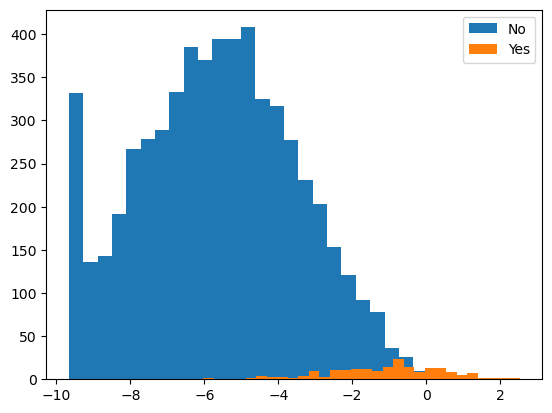

In [15]:
plt.hist(LDA.coef_[0][0]*X_train.iloc[np.where(y_train == 'No')].student + LDA.coef_[0][1]*X_train.iloc[np.where(y_train == 'No')].balance + LDA.intercept_, bins = 30, label = 'No')
plt.hist(LDA.coef_[0][0]*X_train.iloc[np.where(y_train == 'Yes')].student + LDA.coef_[0][1]*X_train.iloc[np.where(y_train == 'Yes')].balance + LDA.intercept_, bins = 30, label = 'Yes')
plt.legend()

Wykorzystując moduł `decision_function` otrzymujemy dokładnie takie same wyniki.

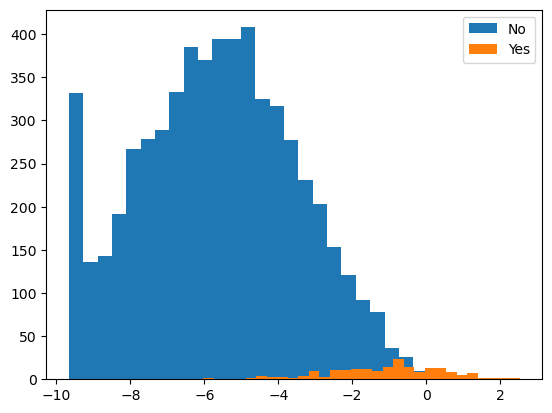

In [16]:
plt.hist(LDA.decision_function(X_train.iloc[np.where(y_train == 'No')]), label = "No", bins = 30)
plt.hist(LDA.decision_function(X_train.iloc[np.where(y_train == 'Yes')]), label = "Yes", bins = 30)
plt.legend()

### Zadanie 5
-----
Wyznacz macierz pomyłek dla modelu `LDA`.

In [17]:
y_pred = LDA.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
confusion_matrix(y_test, y_pred)

array([[3856,    9],
       [ 103,   32]], dtype=int64)

#### ** Niezbalansowane dane - jaką miarą mierzyć jakość modeli?

https://miroslawmamczur.pl/niezbalansowane-dane/

https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

### Zadanie 6
-----
Weźmy pod uwagę zbiór danych `earthquake.txt`. Przygotuj model LDA. Wyznacz wartości `decision_function()` i narysuj wykres w podziale na klasy zmiennej `y`. Wyznacz macierz pomyłek.

In [19]:
earthquake = pd.read_csv('earthquake.txt', sep = " ")

<Axes: xlabel='body', ylabel='surface'>

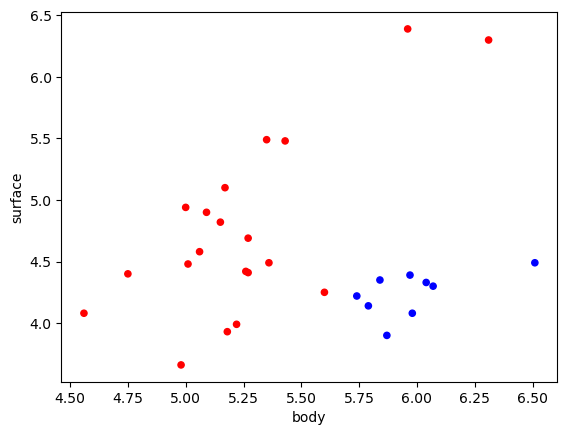

In [20]:
earthquake["color"] = np.where(earthquake["popn"] == "equake", "red", "blue")
earthquake.plot.scatter(x = "body", y = "surface", c = "color") 


In [21]:
y = earthquake.popn #== "equake"
X = earthquake.drop(["popn", "color"], axis = 1)

In [22]:
LDA_earthquake = LinearDiscriminantAnalysis()

### 2. Quadratic Discriminant Analysis (QDA)

### Zadanie 7
-----
Przygotuj dla danych z Zadania 6 model QDA. Wyznacz wartości `decision_function()` i narysuj wykres w podziale na klasy zmiennej `y`. Wyznacz macierz pomyłek.

#### *** Linear and Quadratic Discriminant Analysis with covariance ellipsoid
Na podstawie: https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

cmap = colors.LinearSegmentedColormap(
    "red_blue_classes_new",
    {
        "red": [(0, 1, 1), (1, 0.7, 0.7)],
        "green": [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        "blue": [(0, 0.7, 0.7), (1, 1, 1)],
    },
)
plt.cm.register_cmap(cmap=cmap)

In [ ]:
from scipy import linalg


def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(1, 2, fig_index)
   
    tp = y == y_pred  # True Positive
    tp0, tp1 = tp[y == 'equake'], tp[y == 'explosn'] #tutaj należy pamiętać o zmianie
    X0, X1 = X[y == 'equake'], X[y == 'explosn'] # tutaj należy pamiętać o zmianie
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp["body"], X0_tp["surface"], marker=".", color="red")
    plt.scatter(X0_fp["body"], X0_fp["surface"], marker="x", s=20, color="#990000")  # dark red

    # class 1: dots
    plt.scatter(X1_tp["body"], X1_tp["surface"], marker=".", color="blue")
    plt.scatter(X1_fp["body"], X1_fp["surface"], marker="x", s=20, color="#000099")  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(
        xx, yy, Z, cmap="red_blue_classes_new", norm=colors.Normalize(0.0, 1.0), zorder=0
    )
    plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")

    # means
    plt.plot(
        lda.means_[0][0],
        lda.means_[0][1],
        "*",
        color="yellow",
        markersize=15,
        markeredgecolor="grey",
    )
    plt.plot(
        lda.means_[1][0],
        lda.means_[1][1],
        "*",
        color="yellow",
        markersize=15,
        markeredgecolor="grey",
    )

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(
        mean,
        2 * v[0] ** 0.5,
        2 * v[1] ** 0.5,
        angle=180 + angle,
        facecolor=color,
        edgecolor="black",
        linewidth=2,
    )
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, "red")
    plot_ellipse(splot, lda.means_[1], lda.covariance_, "blue")


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], "red")
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], "blue")

In [ ]:
plt.figure(figsize=(10, 5), facecolor="white")
plt.suptitle(
    "Linear Discriminant Analysis vs Quadratic Discriminant Analysis",
    y=0.98,
    fontsize=15,
)


# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X, y).predict(X)
splot = plot_data(lda, X, y, y_pred, fig_index=1)
plot_lda_cov(lda, splot)
plt.axis("tight")

# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X, y).predict(X)
splot = plot_data(qda, X, y, y_pred, fig_index=2)
plot_qda_cov(qda, splot)
plt.axis("tight")

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()